In [19]:
!pip install qiskit
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import numpy as np
import qiskit
import matplotlib.pyplot as plt
from qiskit import Aer, QuantumCircuit
import graphviz

In [245]:
def arks_representation(statevector: list, d:int = 2)->None:
  num_qudits = int(np.log(len(statevector))/np.log(d))
  graph = graphviz.Graph('arks_repr', format='svg')
  graph.graph_attr.update(splines="false", rankdir='LR')
  graph.node_attr.update(label="")
  with graph.subgraph(name="labelstr") as c:
    c.attr(rank="same")
    c.attr(label="Labels")
    c.node_attr.update(penwidth="0")
    for i in range(d):
      c.node(str(i), label=str(i))
  for k in range(num_qudits):
    with graph.subgraph(name=f"clusterQ{k}") as qudit:
      qudit.attr(rank="same")
      qudit.attr(label=f"Q{k}")
      qudit.attr(group="Q")
      qudit.node_attr.update(shape="circle", style="filled", color="#ADD8E6")
      for i in range(d):
        label = "" if num_qudits > 1 else str(np.round(statevector[i],3))
        qudit.node(f"q{k}_{i}", label=label)

  # Adding invisible edges between labels and 0th qubit to keep them in line
  for i in range(d):
    graph.edge(str(i),f"q0_{i}", style="invis")

  if num_qudits > 1:

    # Adding edges between qubits
    for state, amp in enumerate(statevector):
      if amp != 0:
        state = list(np.base_repr(state, base=d).zfill(num_qudits))
        color = "#"+''.join(np.random.choice(list('0123456789ABCDEF'), 6))

        for idx in range(len(state)-1):
          graph.edge(f"q{idx}_{state[idx]}", 
                    f"q{idx+1}_{state[idx+1]}", 
                    color=color,
                    label=f"<<font color=\"{color}\">{np.round(amp,3)}</font>>",
                    fontsize="9")
          
    # Adding invisible edges between qubits where they are not present to keep them in line
    for k in range(num_qudits-1):
      for i in range(d):
        if f"q{k}_{i} -- q{k+1}_{i}" not in graph.source:
          graph.edge(f"q{k}_{i}",f"q{k+1}_{i}", style="invis")

  return graph

In [246]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
#circuit.cnot(0, 1)
backend = Aer.get_backend("statevector_simulator")
statevector = backend.run(circuit).result().get_statevector()
print(statevector.data)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


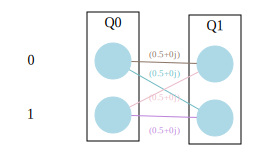

In [247]:
g = arks_representation(statevector.data)
#print(g.source)
#g.render('circuit_arks_repr', format="png", view=True)
g